In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=18)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
model = DecisionTreeClassifier(random_state=100, max_depth=2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.95

In [8]:
model.score(X_train,y_train)

0.9033333333333333

In [9]:
import numpy as np
grid = []
A = np.linspace(X_train['Age'].min(),X_train['Age'].max(),100)
B = np.linspace(X_train['EstimatedSalary'].min(),X_train['EstimatedSalary'].max(),100)
for age in A:
    for sal in B:
        grid.append([age,sal])
grid = np.array(grid)
grid.shape

(10000, 2)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


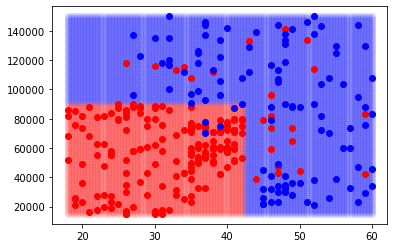

In [10]:
# Plotting DT boundry

yp = model.predict(grid)

class_0 = grid[yp==0]
class_1 = grid[yp==1]

plt.scatter(class_0[:,0], class_0[:,1], c='red', alpha=0.1)
plt.scatter(class_1[:,0], class_1[:,1], c='blue',  alpha=0.1)

# Plotting Train data with actual classes
class_0 = X_train[y_train==0]
class_1 = X_train[y_train==1]

plt.scatter(class_0.iloc[:,0], class_0.iloc[:,1], c='red')
plt.scatter(class_1.iloc[:,0], class_1.iloc[:,1], c='blue')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


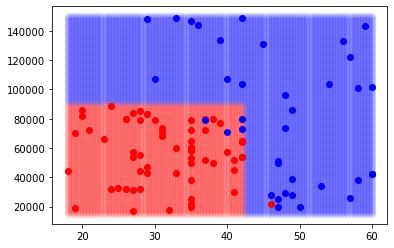

In [11]:
# Plotting DT boundry

yp = model.predict(grid)

class_0 = grid[yp==0]
class_1 = grid[yp==1]

plt.scatter(class_0[:,0], class_0[:,1], c='red', alpha=0.1)
plt.scatter(class_1[:,0], class_1[:,1], c='blue',  alpha=0.1)

# Plotting Test data with actual classes
class_0 = X_test[y_test==0]
class_1 = X_test[y_test==1]

plt.scatter(class_0.iloc[:,0], class_0.iloc[:,1], c='red')
plt.scatter(class_1.iloc[:,0], class_1.iloc[:,1], c='blue')

In [12]:
depths = [1,2,3]
leaf_samples = [1,2,3,4]
for depth in depths:
    for samples in leaf_samples:
        model = DecisionTreeClassifier(random_state=100, max_depth=depth, min_samples_leaf=samples)
        model.fit(X_train,y_train)
        print('DEPTH:', depth, 'MIN SAMPLES LEAF:',samples, 'SCORE:',model.score(X_test,y_test))

DEPTH: 1 MIN SAMPLES LEAF: 1 SCORE: 0.86
DEPTH: 1 MIN SAMPLES LEAF: 2 SCORE: 0.86
DEPTH: 1 MIN SAMPLES LEAF: 3 SCORE: 0.86
DEPTH: 1 MIN SAMPLES LEAF: 4 SCORE: 0.86
DEPTH: 2 MIN SAMPLES LEAF: 1 SCORE: 0.95
DEPTH: 2 MIN SAMPLES LEAF: 2 SCORE: 0.95
DEPTH: 2 MIN SAMPLES LEAF: 3 SCORE: 0.95
DEPTH: 2 MIN SAMPLES LEAF: 4 SCORE: 0.95
DEPTH: 3 MIN SAMPLES LEAF: 1 SCORE: 0.95
DEPTH: 3 MIN SAMPLES LEAF: 2 SCORE: 0.95
DEPTH: 3 MIN SAMPLES LEAF: 3 SCORE: 0.95
DEPTH: 3 MIN SAMPLES LEAF: 4 SCORE: 0.95


# Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = {'max_depth':[1,2,3,4,5]
          ,'min_samples_leaf':[1,2,3,4],
          'min_samples_split':[3,4,5,6]}
grid_cv = GridSearchCV(DecisionTreeClassifier(random_state=100),
                       param_grid=params,cv=4, verbose=2)
grid_cv.fit(X,y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_le

[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6; total time=   0.0s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6]},
             verbose=2)

In [16]:
grid_cv.best_score_

0.8925

In [17]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_split=3, random_state=100)

In [18]:
grid_cv.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [21]:
final_model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1,min_samples_split=3,random_state=100)
final_model.fit(X,y)

DecisionTreeClassifier(max_depth=2, min_samples_split=3, random_state=100)

In [22]:
import pickle

In [23]:
pickle.dump(final_model ,open('mymodel.pkl','wb'))

In [24]:
import pickle